<h1>Extracting and Visualizing Stock Data</h1>


In [10]:
!pip install yfinance==0.2.38
!pip install pandas==2.2.2
!pip install nbformat


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [12]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In [13]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


In [20]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\formatters.py", line 221, in catch_format_error
    r = method(self, *args, **kwargs)
  File "c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\formatters.py", line 342, in __call__
    return method()
  File "c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 1106, in _repr_html_
  File "c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\formats\format.py", line 1110, in to_html
    When formatting an Index subclass
  File "c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\formats\html.py", line 88, in to_string
    lines = self.render()
  File "c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\formats\html.py", line 644, in render
    super().render()
  File "c:\Users\Owner\Ap

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  

## Question 2: Use Webscraping to Extract Tesla Revenue Data


In [23]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')

In [24]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text

    tesla_revenue = pd.concat([tesla_revenue,pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)   

In [25]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

## Question 3: Use yfinance to Extract Stock Data


In [31]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\formatters.py", line 221, in catch_format_error
    r = method(self, *args, **kwargs)
  File "c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\formatters.py", line 342, in __call__
    return method()
  File "c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 1106, in _repr_html_
  File "c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\formats\format.py", line 1110, in to_html
    When formatting an Index subclass
  File "c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\formats\html.py", line 88, in to_string
    lines = self.render()
  File "c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\formats\html.py", line 644, in render
    super().render()
  File "c:\Users\Owner\Ap

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603295  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  

## Question 4: Use Webscraping to Extract GME Revenue Data


In [32]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text
soup = BeautifulSoup(html_data_2, 'html.parser')

In [33]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text

    gme_revenue = pd.concat([gme_revenue,pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)   

In [34]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue.tail()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\formatters.py", line 221, in catch_format_error
    r = method(self, *args, **kwargs)
  File "c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\formatters.py", line 342, in __call__
    return method()
  File "c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 1106, in _repr_html_
  File "c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\formats\format.py", line 1110, in to_html
    When formatting an Index subclass
  File "c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\formats\html.py", line 88, in to_string
    lines = self.render()
  File "c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\formats\html.py", line 644, in render
    super().render()
  File "c:\Users\Owner\Ap

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709

## Question 5: Plot Tesla Stock Graph


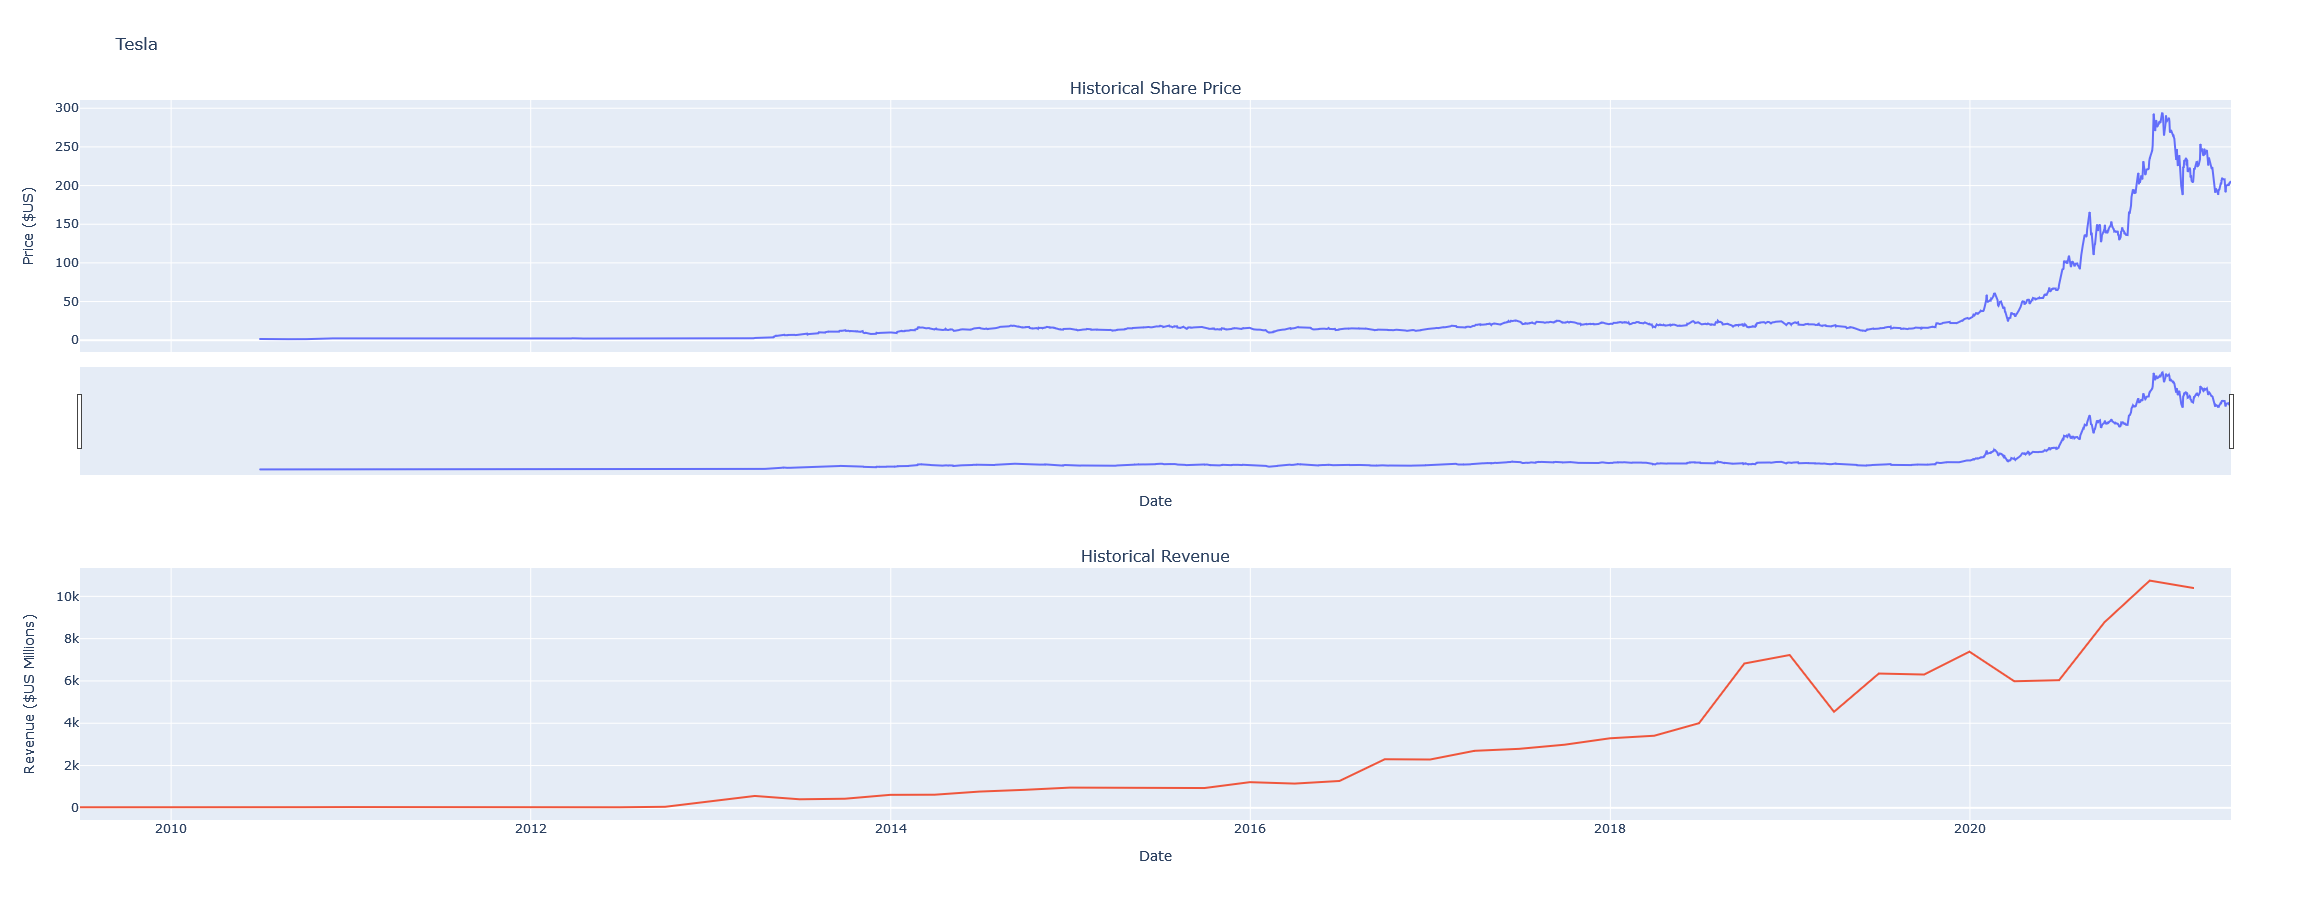

In [28]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph


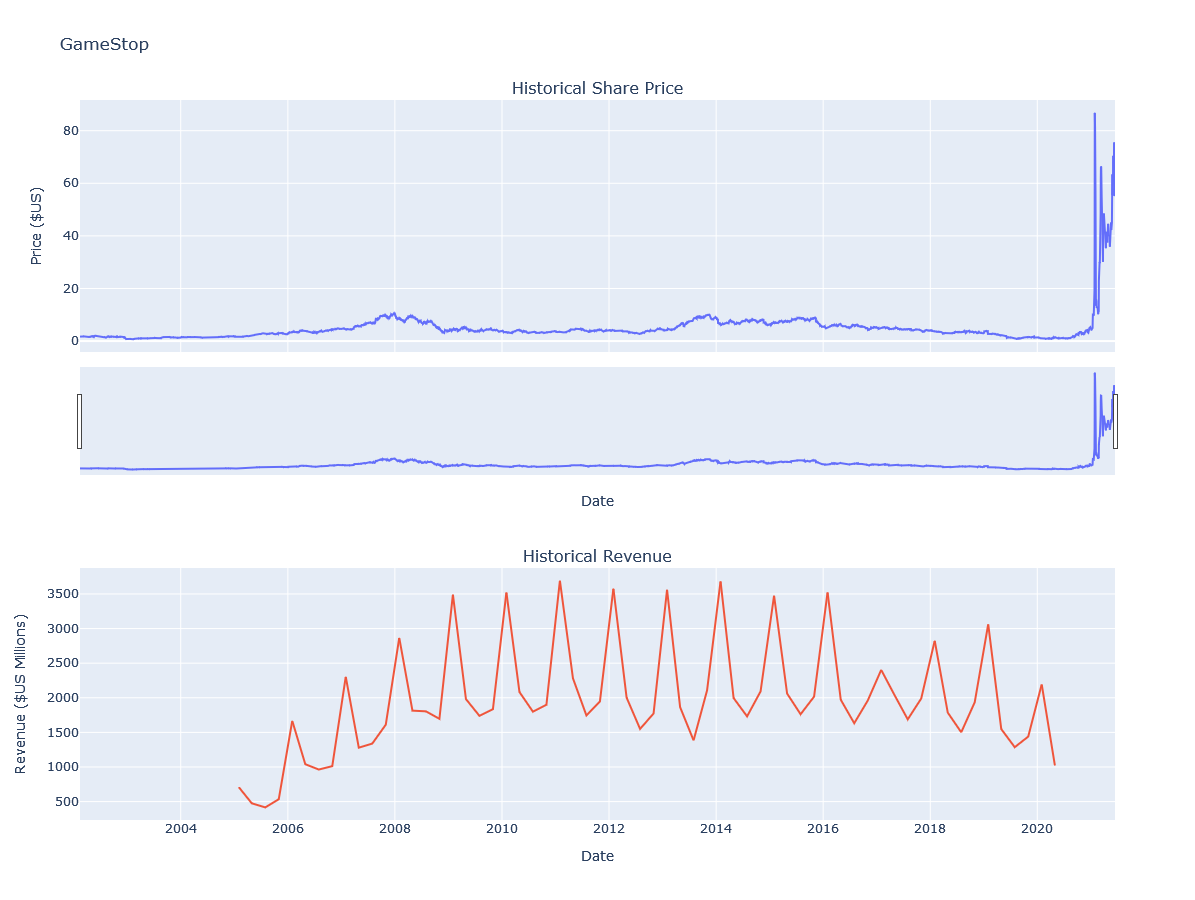

In [27]:
make_graph(gme_data, gme_revenue, 'GameStop')